# **World Data League 2021**
# **Stage 4: Predicting Air Quality for Outdoor Activities**


## **A. Authors**

Yassine  
Gustavo Fonseca  
Rui Granja  

## **B. External links and resources**

1. Main dataset was from the [QART API](https://wdl-data.fra1.digitaloceanspaces.com/cmcascais/qart_documentation.txt) and from the [Cascais municipally website](https://www.cascais.pt/).

2. [Open Elevation API](https://github.com/Jorl17/open-elevation/blob/master/docs/api.md)

3. Road daily traffic from [WDL Phase 2 Road Risk Challenge](https://wdl-data.fra1.digitaloceanspaces.com/pse/m_risk_prfile.zip).

4. Extra weather information from [OpenWeatherAPI](https://openweathermap.org/)

## **C. Context**

Since 2020, Cascais has been implementing an amount of air quality sensors. This ai quality system aims to monitor what’s happening in Cascais and identify areas where there’s a need to act and improve air quality while improving and creating better experiences for its inhabitants.

We need a model that considers the data collected from the system, in correlation with other infrastructure, to identify the best nearby spots in each neighbourhood to spend family time, practice sport, enjoy green areas, or eat outside.

## **D. Goals**

Based on the data collected and its analysis, we would like to have a tool that allows citizens to plan outdoor activities regarding the air quality.

## **E. Outcome**

This problem has several layers that can be tackled, starting from a fundamental solution to something more advanced:
1. A daily predictive model for the air quality of the city of Cascais;
2. Explanation of the prediction of the air quality and possible measures for reducing it, specifically in the areas where outdoor activities are performed;
3. Suggest outdoor activities depending on the predicted air quality.

# **1. Introdution**

Before proceeding any further let's analyse what makes air quality bad.
The city chamber of Cascais measures air quality with 4 different measures:
1. Nitrogen Dioxide NO2
2. Ozone - O3
3. Particles - PM2.5
4. Particles - PM10

They have a table that can be found [here](https://www.cascais.pt/area/rede-de-sensores-de-qualidade-do-ar-e-meteorologia) to decide the quality.

## **1.1 Air Quality Measures**

### **1.1.1 NO2**
"NO2 primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment."

NO2 comes mostly from the following chemical formula:

> 2 NO + O2 -> 2 NO2

NO in this case comes from the combustion processes using air as oxidant.

> O2 + N2 -> 2NO

This has as a source burning of fuel and since it can also comes from metal reactions this can be from cars, trucks, buses, power plants and off-road equipment.

NO2 can also come from environmental causes, such as volcanos and lightening

### **1.1.2 Ozone**

Very oxidizing and very unstable at high concentrations. Half-life varies with temperature, humidity and air movement. Under laboratory conditions, half-life time will average ~1500 minutes (25 hours) with 24ºC, 0 humidity and zero air changes per hour.

Normally Ozone decomposition works in the following way

> 2O3 -> 3O2

In this case we have low-level ozone. This ozone is created by reaction of sunlight on air containing hydrocarbons and nitrogen oxides. This means that NO2 contributes to the production of O3.

### **1.1.3 Particulates PM10 and PM2.5**

Some occur naturally: volcanoes, dust storms, forest and grassland fires. Burning of fossil fuels in vehicles. Antropogenic sources are: burning of fossil fuels, stubble burning, power plants, road dust.

The problem is that PM less than 10 micrometers can pass the nose and throat and settle in the bronchi and lungs. PM2.5 can penetrate the gas exchange regions of the lung (alveolus).

A big part of the PM is of natural origin. But the problem comes from the antropogenic fine particulates, which can cause for a lot of health concerns such as lung cancer.

In this case the measure if for all kinds of particles, and any excess of it can be a cause for concern.

### **1.1.4 Others**

We have access to two other types of compounds. These are the SO2 and CO, which both result from burning of fossil fuels.

## **1.2 Literature Review**

We tried to completement this information with some literature:
1. In a paper, prediction of NO2 was made more valuable with values of NO, which we don't have access to, but the temperature of the previous day helped improve the results with a 6-5-1 Neural Network. [1].
2. An experiment in Palermo, Italy was done with 12 hourly values, wind direction and intensity, barometric pressure, ambient temperature. In this case it was evaluated with a RNN (Elman model) based model for predicting SO2, O3, PM10, NO2 and CO. [2].
3. MLP, RBF, SMLP used to predict PM2.5 concentrations in El Paso and Ciudad Juárez. Data included was the mean PM2.5, wind speed, maximum level of PM2.5 during those first 8 h, wind direction, humidity, and temperature values registered in the first 8 h of the day [3].
4. It was compared with simpler classical models such as linear regression, and the results from NN outperformed them [3].

---
[1] Patricio Perez, Alex Trier, "Prediction of NO and NO2 concentrations near a street with heavy traffic in Santiago, Chile", Atmospheric Environment
Volume 35, Issue 10, April 2001, Pages 1783-1789, https://doi.org/10.1016/S1352-2310(00)00288-0.  
[2] U.Brunelli, V.Piazza, L.Pignato, F.Sorbello, S.Vitabile, "Two-days ahead prediction of daily maximum concentrations of SO2, O3, PM10, NO2, CO in the urban area of Palermo, Italy", Atmospheric Environment Volume 41, Issue 14, May 2007, Pages 2967-2995, https://doi.org/10.1016/j.atmosenv.2006.12.013  
[3] J.B.Ordieres, E.P.Vergara, R.S.Capuz, R.E.Salazar, "Neural network prediction model for fine particulate matter (PM2.5) on the US–Mexico border in El Paso (Texas) and Ciudad Juárez (Chihuahua)", Environmental Modelling & Software Volume 20, Issue 5, May 2005, Pages 547-559 https://doi.org/10.1016/j.envsoft.2004.03.010

---

To start, we will build up the dataset. Each of the air quality measures will have its own metrics but we should ensure we have them all.

# **2. Development**

## **2.1 Initial Setup**

First we set up the working directory and make the installations and imports.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
# Mount
# Go into Google Drive to get the data

from google.colab import drive
import pandas as pd
import numpy as np
drive.mount("/content/gdrive/", force_remount=True)
%cd gdrive/
%cd My Drive
%cd WDL 
%cd WDL Project 4

Mounted at /content/gdrive/
/content/gdrive
/content/gdrive/My Drive
[Errno 2] No such file or directory: 'WDL'
/content/gdrive/My Drive
/content/gdrive/My Drive/WDL Project 4


In [6]:
!pip install q keras==1.2.2 -q
#!pip install ml_metrics -q
#!pip install geopandas -q
#!pip install contextily -q
#!pip install osmnx -q

In [3]:
# -*- coding: utf-8 -*-
from __future__ import division
import numpy as np
np.random.seed(7)
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Merge, Embedding, Flatten
from keras.callbacks import Callback
import ml_metrics as metrics
from sklearn.cluster import MeanShift
from math import radians, cos, sin, asin, sqrt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import contextily as ctx
import requests
import json
import time
from datetime import datetime

## **2.2 Loading main dataset**

The main dataset for Cascais is the QART API. It collects several different measures which we will analyse in the next section.

> **QART Cascais API**

From the API we have 10 different sensors collecting 13 different measures:  
1. 0NO2 - Nitrogen Dioxide - NO2  
2. 00O3 - Ozone - O3  
3. PM25 - Particles - PM2.5  
4. PM10 - Particles - PM10  
5. 0SO2 - Sulfur dioxide - SO2  
6. 00CO - Carbon Monoxide - CO  
7. LAEQ - noise, LAEq  
8. 00PA - pressure  
9. 00HR - relative humidity  
10. TEMP - temperature  
11. 00VI - wind speed  
12. 00VD - wind direction  
13. 00PP - precipitation  

In [5]:
# We made combinations for these types of data.
sensor_ids = ['0001', '0002', '0003', '0004', '0006', '0007', '0008', '0009', '0010', '0005']
print("sensor IDs: ", sensor_ids)
measure_type = [
    "0NO2", "00O3", "PM25", "PM10", "0SO2",
    "00CO", "LAEQ", "00PA", "00HR", "TEMP",
    "00VI", "00VD", "00PP",
]
types = [
    "QA", "RU", "ME",
]

sensor IDs:  ['0001', '0002', '0003', '0004', '0006', '0007', '0008', '0009', '0010', '0005']


In [6]:
%%time

import time

# In case we need to get data from the API -> True
RUN = False

if RUN:
  dataset = pd.DataFrame()
  for sensor in sensor_ids:
    for measure in measure_type:
      for typ in types:
        r = requests.get(f"http://opendata-cascais.qart.pt/measurements/{typ}{measure}{sensor}?startDate=202001010000&endDate=202105310000")
        if r.status_code==429:
          x = 1
          while x:
            print(f"Gotta wait a bit for {typ}{measure}{sensor}")
            time.sleep(60)
            r = requests.get(f"http://opendata-cascais.qart.pt/measurements/{typ}{measure}{sensor}?startDate=202001010000&endDate=202105310000")
            if r.status_code==200:
              x = 0
        if r.status_code==200:
          temp_df = pd.DataFrame(r.json())
          dataset = pd.concat([dataset, temp_df])
          print("*", end='')
        else:
          print(r.status_code)
  dataset.to_csv('sensor_data.csv', index=False)
else:
  # Read data when we already have it in the cwd
  dataset = pd.read_csv('sensor_data.csv')

CPU times: user 25.4 ms, sys: 19.6 ms, total: 45 ms
Wall time: 1.35 s


In [7]:
# Let's check the data
dataset.head()

id avg          date  value   unit
0  QA0NO20001  1d  202105260000  110.0  µg/m3
1  QA0NO20001  1d  202105250000  100.0  µg/m3
2  QA0NO20001  1d  202105240000  100.0  µg/m3
3  QA0NO20001  1d  202105230000  100.0  µg/m3
4  QA0NO20001  1d  202105220000   97.0  µg/m3

In [8]:
# Let's analyse the average column
dataset.avg.unique() # To know if we have another type of average in the data

array(['1d'], dtype=object)

In [9]:
# We don't so we drop it
dataset.drop(columns=['avg'], inplace=True)

In [10]:
# Get information about the date
hours = dataset[~dataset.date.astype(str).str.contains('0000$')].shape[0]
print(f"We have {hours} number of different hours.")

We have 0 number of different hours.


In [11]:
# We don't have hours in the date field, all are '0000', so we will take away this part from the date.
dataset.date = dataset.date.apply(lambda x: int(x/10000))
dataset.head()

id      date  value   unit
0  QA0NO20001  20210526  110.0  µg/m3
1  QA0NO20001  20210525  100.0  µg/m3
2  QA0NO20001  20210524  100.0  µg/m3
3  QA0NO20001  20210523  100.0  µg/m3
4  QA0NO20001  20210522   97.0  µg/m3

In [12]:
# Transform date into datetime format
dataset['date'] = pd.to_datetime(dataset.date, format='%Y%m%d')
dataset.head()

id       date  value   unit
0  QA0NO20001 2021-05-26  110.0  µg/m3
1  QA0NO20001 2021-05-25  100.0  µg/m3
2  QA0NO20001 2021-05-24  100.0  µg/m3
3  QA0NO20001 2021-05-23  100.0  µg/m3
4  QA0NO20001 2021-05-22   97.0  µg/m3

In [13]:
# Get sensor ID and the measure
dataset['sensor'] = dataset.id.apply(lambda x: int(x[-4:]))
# dataset['type'] = dataset.id.apply(lambda x: x[:2]) # No need because measures are subcategories of types
dataset['measure'] = dataset.id.apply(lambda x: x[2:6])
dataset.drop(columns=['id'], inplace=True)
dataset.head()

date  value   unit  sensor measure
0 2021-05-26  110.0  µg/m3       1    0NO2
1 2021-05-25  100.0  µg/m3       1    0NO2
2 2021-05-24  100.0  µg/m3       1    0NO2
3 2021-05-23  100.0  µg/m3       1    0NO2
4 2021-05-22   97.0  µg/m3       1    0NO2

In [14]:
# Since we have an unit for each measure, we combine to make the measure more informative
dataset['measure_unit'] = dataset.measure + ' (' + dataset.unit + ')'
dataset.head()

date  value   unit  sensor measure  measure_unit
0 2021-05-26  110.0  µg/m3       1    0NO2  0NO2 (µg/m3)
1 2021-05-25  100.0  µg/m3       1    0NO2  0NO2 (µg/m3)
2 2021-05-24  100.0  µg/m3       1    0NO2  0NO2 (µg/m3)
3 2021-05-23  100.0  µg/m3       1    0NO2  0NO2 (µg/m3)
4 2021-05-22   97.0  µg/m3       1    0NO2  0NO2 (µg/m3)

In [15]:
# We pivot the table so we can get all values for each (sensor,date) in each row
dataset = dataset.pivot(index=['sensor','date'], columns='measure_unit', values='value').reset_index()
dataset.head()

measure_unit  sensor       date  ...  PM25 (µg/m3)  TEMP (ºC)
0                  1 2020-05-10  ...           9.0      -99.0
1                  1 2020-05-11  ...          16.0      -99.0
2                  1 2020-05-12  ...           7.0      -99.0
3                  1 2020-05-13  ...           6.0      -99.0
4                  1 2020-05-14  ...           4.0      -99.0

[5 rows x 15 columns]

At this part we have managed to collect the data from the QART API and process it accordingly to make it ready to explore and use.

## **2.3. Main Data Exploration**

Now let's analyse the data that we have and see from this dataset, what we can use for our predictions.

We start by seeing the amount of errors we have in each of the columns.

In [16]:
# Create table with number of errors in each of these data points

analyze_data = {}
analyze_data['columns'] = dataset.columns.tolist()[2:]

no_observation = []
inoperational = []
extreme = []
anomalies = []

ln = dataset.shape[0]

for col in analyze_data['columns']:
  no_observation.append((dataset[col]==-99).sum() / ln)
  inoperational.append((dataset[col]==-88).sum() / ln)
  extreme.append((dataset[col]==-77).sum() / ln)
  anomalies.append((dataset[col]==-66).sum() / ln)

analyze_data['no_observation (%)'] = no_observation
analyze_data['inoperational (%)'] = inoperational
analyze_data['extreme (%)'] = extreme
analyze_data['anomalies (%)'] = anomalies

analyze_data = pd.DataFrame(analyze_data)
analyze_data.head(50)

columns  no_observation (%)  ...  extreme (%)  anomalies (%)
0   00CO (mg/m3)            0.000000  ...          0.0            0.0
1       00HR (%)            0.209446  ...          0.0            0.0
2   00O3 (µg/m3)            0.000000  ...          0.0            0.0
3    00PA (Mbar)            0.209446  ...          0.0            0.0
4      00PP (mm)            0.705863  ...          0.0            0.0
5       00VD (º)            0.212052  ...          0.0            0.0
6    00VI (km/h)            0.209446  ...          0.0            0.0
7   0NO2 (µg/m3)            0.000000  ...          0.0            0.0
8   0SO2 (µg/m3)            1.000000  ...          0.0            0.0
9   LAEQ (dB(A))            0.001629  ...          0.0            0.0
10  PM10 (µg/m3)            0.000000  ...          0.0            0.0
11  PM25 (µg/m3)            0.000651  ...          0.0            0.0
12     TEMP (ºC)            0.209446  ...          0.0            0.0

[13 rows x 5 columns]

For both `0SO2` and `00PP` we have very few numbers. For that reason we will have to drop them from the dataset.

In [17]:
dataset.drop(columns=['00PP (mm)', '0SO2 (µg/m3)'], inplace=True)

There are a few other columns that also have a high percentage of no_observation values, but we will analyse those cases later for each of the sensors.

We move on to understand the target values. In the eventual case we would like to turn this into the classification problem, we will analyse how many rows do we have for each of the types of air quality as seen in the following table:

![](https://drive.google.com/uc?export=view&id=17hodYOwdUF65WagqDEb3am9moY-kQlPJ)

In [18]:
values = ['PM10 (µg/m3)', 'PM25 (µg/m3)', '0NO2 (µg/m3)', '00O3 (µg/m3)']
mins = [[0,20,35,50,100],[0,10,20,25,50],[0,40,100,200,400],[0,80,100,180,240]]
maxes = [[20,35,50,100,1200],[10,20,25,50,800],[40,100,200,400,1000],[80,100,180,240,600]]
pm10 = []
pm25 = []
no2 = []
o3 = []
all_ = [pm10,pm25,no2,o3]

dict_ = {}

for i, value in enumerate(values):
  for j in range(5):
    all_[i].append(((dataset[value]>=mins[i][j]) & (dataset[value]<maxes[i][j])).sum())
  dict_[value] = all_[i]

In [19]:
dist_classification = pd.DataFrame(dict_)
dist_classification.index = ['Very Good', 'Good', 'Average', 'Weak', 'Bad']
dist_classification.index.name = 'Classification'
dist_classification.head(10)

PM10 (µg/m3)  PM25 (µg/m3)  0NO2 (µg/m3)  00O3 (µg/m3)
Classification                                                        
Very Good               1588          2100           179          1665
Good                     938           772          2077           887
Average                  354            89           808           502
Weak                     133            67             6            14
Bad                       57            40             0             2

Since we have a decent number of values for each class, we will create class columns for each of these values.

In [20]:
def to_class(x, mins, maxes):
  i = 0
  for min_,max_ in zip(mins,maxes):
    if (x>=min_) & (x<=max_):
      return i
    i+=1
  return -1 # In case the values are out of the intervals (only case at this moment is -99 cases of PM2.5)
    

dataset['PM10_Class'] = dataset['PM10 (µg/m3)'].apply(to_class, args=(mins[0],maxes[0]))
dataset['PM25_Class'] = dataset['PM25 (µg/m3)'].apply(to_class, args=(mins[1],maxes[1]))
dataset['NO2_Class'] = dataset['0NO2 (µg/m3)'].apply(to_class, args=(mins[2],maxes[2]))
dataset['O3_Class'] = dataset['00O3 (µg/m3)'].apply(to_class, args=(mins[3],maxes[3]))

Even though we do not work with these classes, we still recommend in the future work to do some experiments with it.

## **2.4 Adding more data**

### **2.4.1 Extra weather data**

Since some weather data is missing, such as precipitation, we will use Weather API to get what we are currently missing. 

In [21]:
# Secrets in json
with open('secrets/api_key.json') as json_file:
    secrets = json.load(json_file)

In [22]:
start = 1577836800
end = 1622149473

API_KEY = secrets['API_KEY']

In [23]:
Run = False
if Run:
  r = requests.get(f'http://history.openweathermap.org/data/2.5/history/wdl?id=2269594&start=1577836800&end=1622149473&appid={API_KEY}')
  weather_data = pd.DataFrame(r.json()['list'])
  # Extracting the values from the dictionaries in the dataset
  weather_data['Temp'] = weather_data.main.apply(lambda x: x['temp'])
  weather_data['Pressure'] = weather_data.main.apply(lambda x: x['pressure'])
  weather_data['Humidity'] = weather_data.main.apply(lambda x: x['humidity'])
  weather_data['WindSpeed'] = weather_data.wind.apply(lambda x: x['speed'])
  # Transforming Unix timestamp to Datetime
  weather_data['date-time'] = weather_data.dt.apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

  # Getting precipitation
  weather_data['precipitation'] = weather_data.rain.apply(lambda x: x[list(x.keys())[0]] if isinstance(x, dict) else 0)
  weather_data['precipitation_hours'] = weather_data.rain.apply(lambda x: list(x.keys())[0] if isinstance(x, dict) else 0)
  weather_data.to_csv('weather_data.csv', index=False)

else:
  weather_data = pd.read_csv('weather_data.csv')

In [24]:
weather_data = weather_data[['date-time', 'precipitation', 'precipitation_hours', 'Temp', 'Pressure', 'Humidity', 'WindSpeed']]

With some investigation we find out that these cases are isolated, but some of them are one after the other, like this:
  
8:00 -> 3h: 3.0  
9:00 -> 3h: 3.0  
10:00 -> 3h 3.0  

What we will do is divide all the 2+ precipition values by 3. So in this case we will have:

8:00 -> 3h: 3.0  
9:00 -> 3h: 1.0  
10:00 -> 3h 1.0  

In [25]:
# Here we check which rows in the weatherAPI have data for the last 3h so we can correct them
weather_data[weather_data.precipitation_hours == '3h']

date-time  precipitation  ... Humidity  WindSpeed
605   2020-01-26 05:00:00           0.25  ...      100       2.10
606   2020-01-26 06:00:00           0.25  ...      100       1.00
607   2020-01-26 07:00:00           0.25  ...      100       0.50
611   2020-01-26 11:00:00           0.13  ...       93       3.49
612   2020-01-26 12:00:00           0.13  ...       91       3.49
613   2020-01-26 13:00:00           0.06  ...       87       3.18
1805  2020-03-16 05:00:00           0.13  ...       70       5.10
1806  2020-03-16 06:00:00           0.13  ...       70       5.70
2277  2020-04-04 21:00:00           0.25  ...       77       7.20
2522  2020-04-15 02:00:00           0.81  ...       87       5.10
2807  2020-04-26 23:00:00           0.16  ...       93       2.60
2808  2020-04-27 00:00:00           0.16  ...       87       1.50
2814  2020-04-27 07:00:00           0.37  ...       89       2.95

[13 rows x 7 columns]

In [26]:
# Fixing the precipitation data, very few cases so we will update them pontually
weather_data.iloc[606:608,1] = weather_data.iloc[606:608,1] / 3
weather_data.iloc[611:614,1] = weather_data.iloc[611:614,1] / 3
weather_data.iloc[1806,1] = weather_data.iloc[1806,1] / 3
weather_data.iloc[2808,1] = weather_data.iloc[2808,1] / 3
weather_data.drop(columns=['precipitation_hours'], inplace=True)
weather_data.head()

date-time  precipitation    Temp  Pressure  Humidity  WindSpeed
0  2020-01-01 00:00:00            0.0  282.16      1031        93        1.5
1  2020-01-01 01:00:00            0.0  281.98      1031       100        1.5
2  2020-01-01 02:00:00            0.0  281.15      1031       100        2.1
3  2020-01-01 03:00:00            0.0  280.77      1030       100        1.5
4  2020-01-01 04:00:00            0.0  280.39      1030       100        1.0

In [27]:
# We group the data by day accordingly for each measure
weather_data['date'] = pd.to_datetime(weather_data['date-time']).dt.floor('d')
weather_data = weather_data.groupby('date').agg({'precipitation': 'sum', 'Temp': 'mean', 'Pressure': 'mean', 'Humidity': 'mean', 'WindSpeed':'mean'})

In [28]:
# The final weather data to be used as a replacement
weather_data = weather_data.reset_index()
weather_data.head()

date  precipitation        Temp     Pressure   Humidity  WindSpeed
0 2020-01-01            0.0  282.203333  1030.666667  92.625000   1.497917
1 2020-01-02            0.0  283.118750  1030.208333  95.000000   1.744583
2 2020-01-03            0.0  285.853750  1032.875000  85.750000   1.729167
3 2020-01-04            0.0  285.469583  1032.541667  78.333333   2.687500
4 2020-01-05            0.0  283.101250  1029.250000  76.458333   2.516667

Now for the **conversions**.
We will be using this data only when it is missing from the sensors, so we have to have the same units.

**WHAT | OpenWeatherAPI | QART API**

PP | Rain Volume | mm  --> It is the same 10mm -> 10L  
Temp | Kelvin | ºC  --> Kelvin - 273.15 = C  
Pressure | hPa | Mbar  --> 1hPa == 1Mbar  
Humidity | % | %  --> ==  
Windspeed | m/s | km/h  --> m/s * 3.6 = km/h  

In [29]:
# Conversions to the same SI as the QART API data
weather_data['Temp'] = weather_data['Temp'] - 273.15
weather_data['WindSpeed'] = weather_data['WindSpeed'] * 3.6

In [30]:
weather_data.head()

date  precipitation       Temp     Pressure   Humidity  WindSpeed
0 2020-01-01            0.0   9.053333  1030.666667  92.625000     5.3925
1 2020-01-02            0.0   9.968750  1030.208333  95.000000     6.2805
2 2020-01-03            0.0  12.703750  1032.875000  85.750000     6.2250
3 2020-01-04            0.0  12.319583  1032.541667  78.333333     9.6750
4 2020-01-05            0.0   9.951250  1029.250000  76.458333     9.0600

The weather data is now ready to be used as a replacement for the QART weather data when needed.

---

### **2.4.2 Elevation Data**

Before we proceed we need to get the locations for the sensors. The last measurements have latitude and longitude information for 9 sensors.

In [31]:
Run = False
if Run:
  r = requests.get('http://opendata-cascais.qart.pt/lastmeasurements')
  sensor_location = pd.DataFrame(r.json())
  sensor_location['latitude'] = sensor_location.coordinates.apply(lambda x: x['lat'])
  sensor_location['longitude'] = sensor_location.coordinates.apply(lambda x: x['lng'])
  sensor_location['sensor'] = sensor_location.id.apply(lambda x: int(x[-4:]))
  sensor_location.drop_duplicates(subset='sensor', inplace=True)
  sensor_location.to_csv('sensors.csv', index=False)
else:
  sensor_location = pd.read_csv('sensors.csv')

In [32]:
sensor_location = gpd.GeoDataFrame(sensor_location, geometry=gpd.points_from_xy(sensor_location.longitude, sensor_location.latitude), crs=4326)

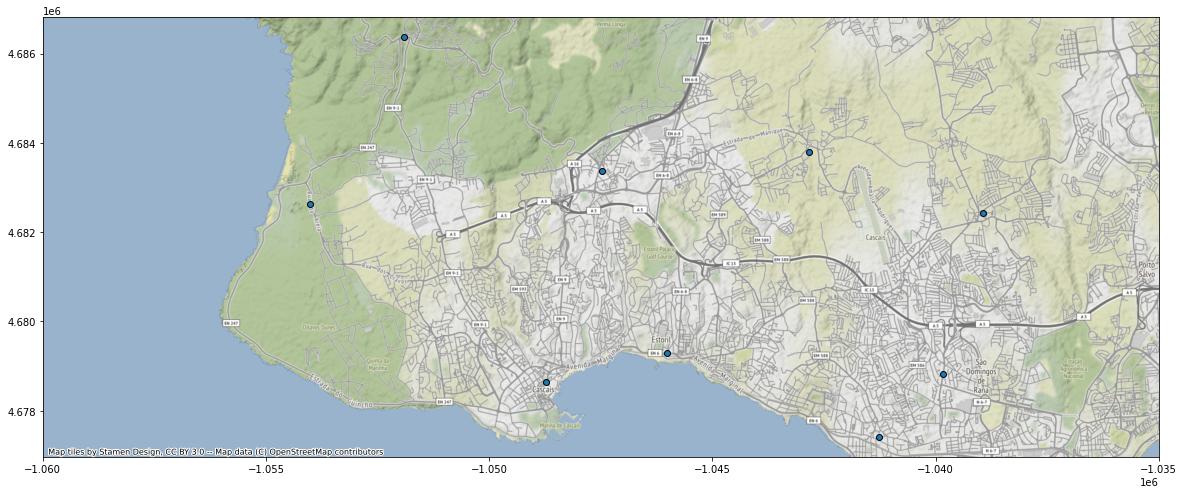

In [33]:
sensor_location = sensor_location.to_crs(epsg=3857)
# Visualize the sensors in Cascais
ax = sensor_location.plot(figsize=(20,10), edgecolor='k')
ax.set_xlim(-1060000, -1035000)
ctx.add_basemap(ax)

We use the open-elevation API to collect elevation information.

In [34]:
Run = False
if Run:
  lats = list(sensor_location.latitude)
  lons = list(sensor_location.longitude)
  elev = []
  for lat, lon in zip(lats,lons):
    x = 1
    while (x):
      r = requests.get(f'https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}')
      if r.status_code == 200:
        print("Managed!")
        elev.append(r.json()['results'][0]['elevation'])
        x = 0
      else:
        print("Didn't manage: ",r.status_code)
  print(elev)
else:
  elev = [36, 143, 56, 108, 82, 122, 70, 16, 18] # Added after getting the elevations from the API

In [35]:
sensor_location['elevation'] = elev
sensor_location.head()

id avg  ...                          geometry elevation
0  QA00NO0001  1d  ...  POINT (-1041261.589 4677416.279)        36
1  QA00NO0002  1d  ...  POINT (-1051897.276 4686363.722)       143
2  QA00NO0003  1d  ...  POINT (-1054009.674 4682624.500)        56
3  QA00NO0004  1d  ...  POINT (-1038927.108 4682421.166)       108
4  QA00NO0006  1d  ...  POINT (-1042840.656 4683797.926)        82

[5 rows x 13 columns]

---

### **2.4.3 Street Data**

For street information, we have street data from phase 2 challenge road risk in Porto and Lisbon regions. We will cross reference the Lisbon region road information with our sensor data.


In [36]:
risk_roads = gpd.read_file('data/road_risk_profile.json')
risk_roads.head()

Link_ID  ...                                           geometry
0  80216819  ...  LINESTRING (-9.16402 38.77030, -9.16389 38.770...
1  80216858  ...  LINESTRING (-9.16645 38.74274, -9.16638 38.742...
2  80216859  ...  LINESTRING (-9.16645 38.74274, -9.16637 38.742...
3  80216860  ...  LINESTRING (-9.16588 38.74370, -9.16568 38.744...
4  80216867  ...  LINESTRING (-9.16472 38.74478, -9.16487 38.744...

[5 rows x 10 columns]

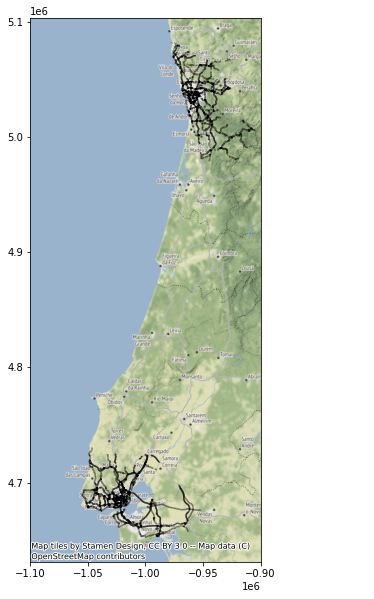

In [37]:
# Here is the geo information for the roads in Porto and Lisbon
risk_roads = risk_roads.to_crs(epsg=3857)
ax = risk_roads.plot(figsize=(20,10), alpha=0.5, edgecolor='k')
ax.set_xlim(-1100000, -900000)
ctx.add_basemap(ax)

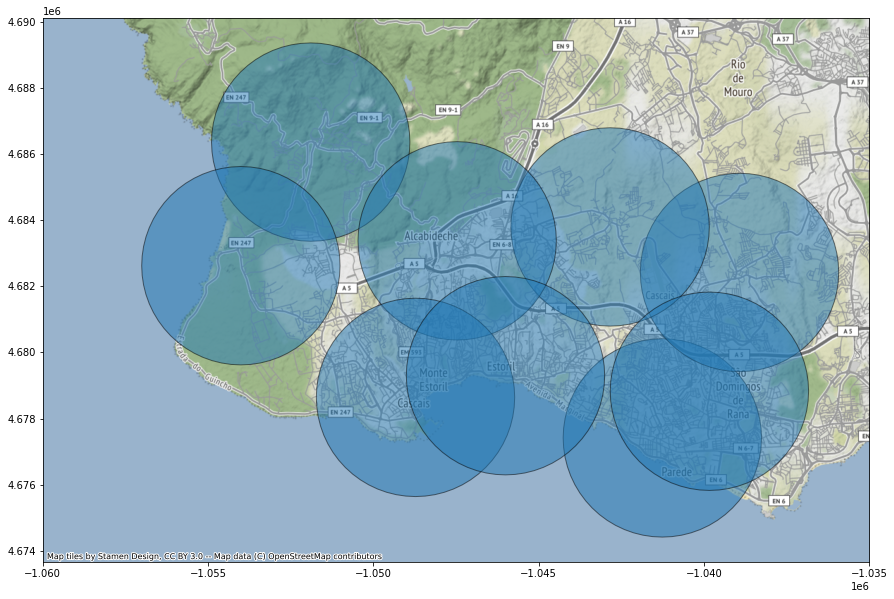

In [38]:
# Before intersecting with the roads, I will buffer the location of the sensors by 3km to detect close by roads
sensor_location['buffer_geo'] = sensor_location['geometry'].buffer(3000)
sensor_location = sensor_location.set_geometry('buffer_geo')
ax = sensor_location.plot(figsize=(20,10), edgecolor='k', alpha=0.5)
ax.set_xlim(-1060000, -1035000)
ctx.add_basemap(ax)

In [39]:
# We do a spatial join to intersect the data by the geolocation
cascais_roads = gpd.sjoin(risk_roads, sensor_location, how='right', op='intersects')

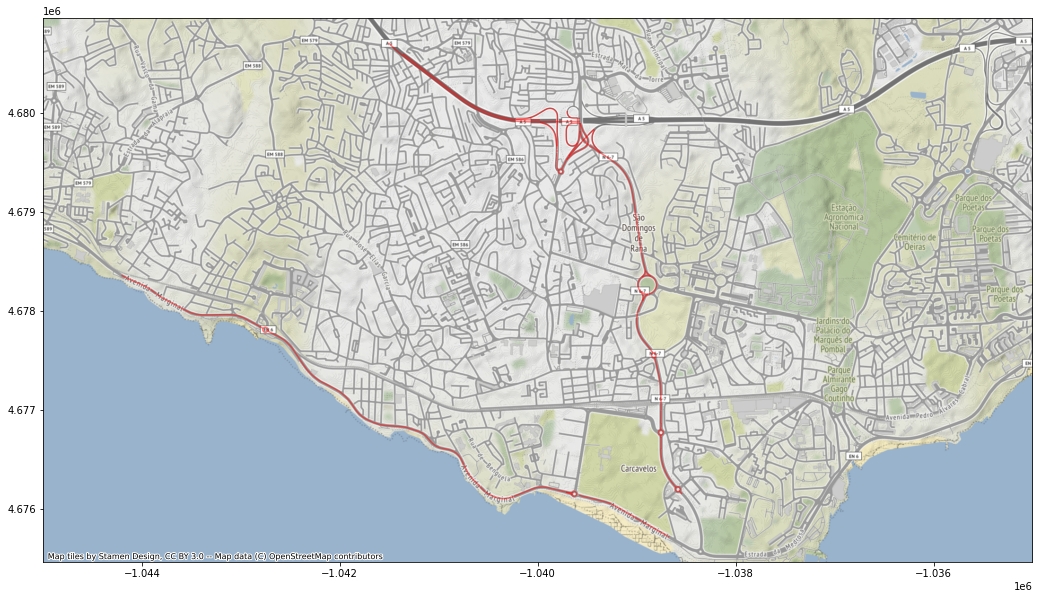

In [40]:
# We can visualize the roads close to sensor 1 in this plot
ax = risk_roads[risk_roads.linkid.isin(list(cascais_roads[cascais_roads.sensor==1].linkid))].plot(figsize=(20,10), edgecolor='r', alpha=0.5)
ax.set_xlim(-1045000, -1035000)
ctx.add_basemap(ax)

Since we have several roads, and we have multiple roads missing, we cannot make a proper average of the cars in the area.

Because of this we will use the maximum number of cars in these roads we have access to information from.

In [41]:
# In the end we get the maximum daily average traffic close to each sensor
cascais_roads = cascais_roads[['sensor', 'Daily_Aver']].groupby('sensor').max().reset_index()
cascais_roads.head()

sensor   Daily_Aver
0       1  7088.283986
1       2  5902.463157
2       3  3449.963072
3       4  9025.578100
4       6  4762.917656

---

## **2.5 Building Up the Final Datasets.**

In [42]:
# We merge the weather, elevation and max daily road average traffic with the sensor and day information

dataset = dataset.merge(sensor_location[['sensor', 'elevation']], how='left', on='sensor')
dataset = dataset.merge(cascais_roads, on='sensor', how='left').rename(columns={'Daily_Aver': 'max_road_traffic'})
dataset = dataset.merge(weather_data, on='date', how='left')
dataset.head()

sensor       date  00CO (mg/m3)  ...     Pressure   Humidity  WindSpeed
0       1 2020-05-10      0.129659  ...  1009.125000  81.416667    22.7055
1       1 2020-05-11      0.121336  ...  1007.708333  81.958333    21.8400
2       1 2020-05-12      0.141763  ...  1008.375000  82.291667    10.9380
3       1 2020-05-13      0.138861  ...  1003.500000  82.625000    14.4615
4       1 2020-05-14      0.139235  ...  1003.666667  83.791667    14.0175

[5 rows x 24 columns]

The strategy here will be to build up 4 * sensors datasets. This will happen because:

1. Every air quality measure will have its own model due to the different sources of pollutents;
2. The 4 models should be able to adapt to the sensor they are making predictions, since they will have sensor specific data: elevation and max road traffic in a 3Km radius.

### **2.5.1 Selecting Features**

Before proceeding with selecting the important features, we will explore the data a bit further to understand which should be the most relevant for our predictions.

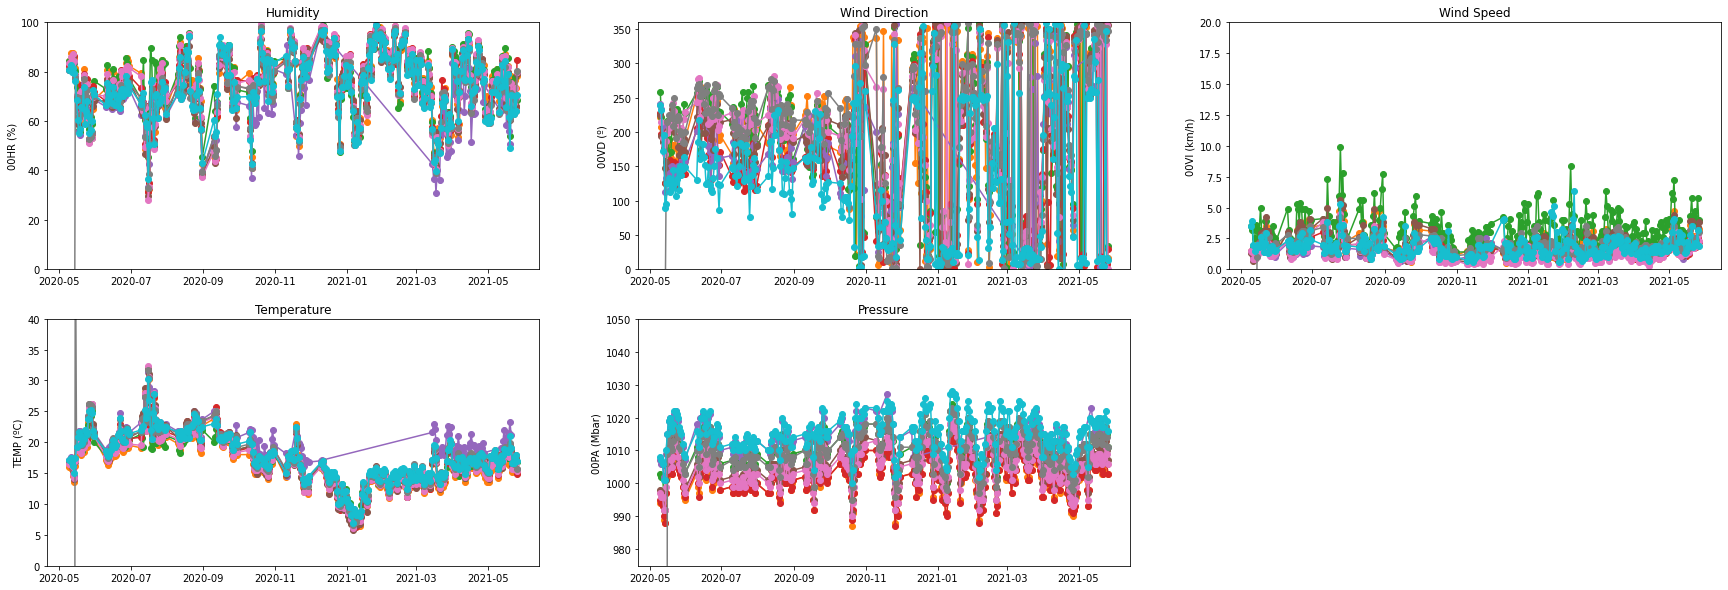

In [43]:
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['00HR (%)'], '-o')
plt.axis(ymin=0, ymax=100)
plt.ylabel('00HR (%)')
plt.title('Humidity')

plt.subplot(2,3,5)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['00PA (Mbar)'], '-o')
plt.axis(ymin=975,ymax=1050)
plt.ylabel('00PA (Mbar)')
plt.title('Pressure')

plt.subplot(2,3,2)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['00VD (º)'], '-o')
plt.axis(ymin=0,ymax=360)
plt.ylabel('00VD (º)')
plt.title('Wind Direction')

plt.subplot(2,3,3)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['00VI (km/h)'], '-o')
plt.axis(ymin=0,ymax=20)
plt.ylabel('00VI (km/h)')
plt.title('Wind Speed')

plt.subplot(2,3,4)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['TEMP (ºC)'], '-o')
plt.axis(ymin=0,ymax=40)
plt.ylabel('TEMP (ºC)')
plt.title('Temperature');


After exploringa bit the datasets, we noticed that:
1. Sensors 1 and 9 have non-existent weather information, we will be able to replace that information with OpenWeatherAPI information.
2. Sensor 5 has a lot of missing information, can ignore in this case.

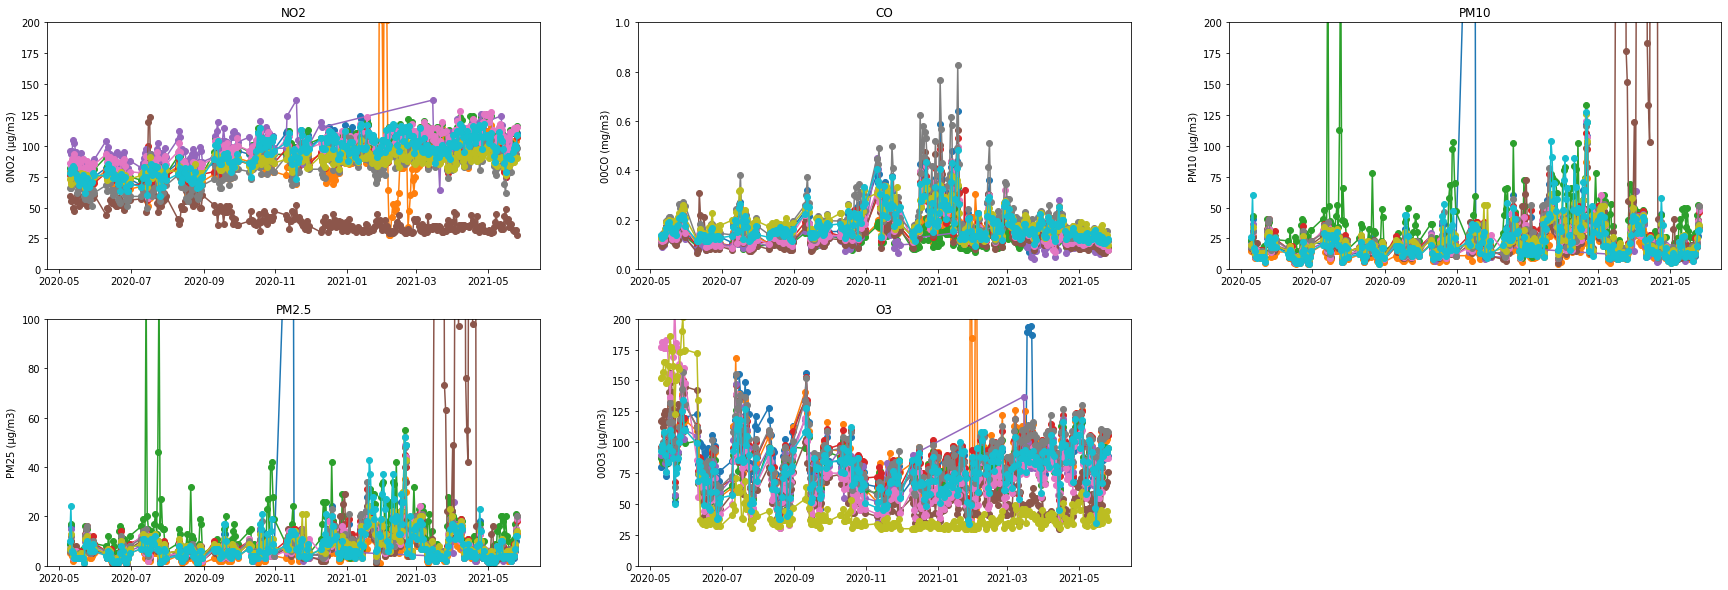

In [44]:
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['0NO2 (µg/m3)'], '-o')
plt.axis(ymin=0, ymax=200)
plt.ylabel('0NO2 (µg/m3)')
plt.title('NO2')

plt.subplot(2,3,5)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['00O3 (µg/m3)'], '-o')
plt.ylabel('00O3 (µg/m3)')
plt.axis(ymin=0, ymax=200)
plt.title('O3')

plt.subplot(2,3,2)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['00CO (mg/m3)'], '-o')
plt.ylabel('00CO (mg/m3)')
plt.axis(ymin=0, ymax=1)
plt.title('CO')

plt.subplot(2,3,3)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['PM10 (µg/m3)'], '-o')
plt.axis(ymin=0, ymax=200)
plt.ylabel('PM10 (µg/m3)')
plt.title('PM10')

plt.subplot(2,3,4)
for sensor in range(1,11):
  plt.plot(dataset[dataset.sensor==sensor].date, dataset[dataset.sensor==sensor]['PM25 (µg/m3)'], '-o')
plt.axis(ymin=0, ymax=100)
plt.ylabel('PM25 (µg/m3)')
plt.title('PM2.5');


---
**Investigation:**

We were wondering about the variations on the measures. We decided to explore some of the maximums.

In [45]:
dataset[(dataset['PM10 (µg/m3)']==dataset[(dataset['sensor']==9)]['PM10 (µg/m3)'].max())]

sensor       date  00CO (mg/m3)  ...  Pressure   Humidity  WindSpeed
2654       9 2021-02-19      0.121473  ...  1015.625  91.208333     27.492

[1 rows x 24 columns]

Some sensors detect sudden peaks in air quality measures, these could be related with North African dust, as predicted by [this report](https://qualar.apambiente.pt/download/documentos.ficheiro.a829fe9aa5f7ab82.505245564953414f5f454e5f323032315f30325f31382e706466.pdf). This reported case could be possible since it is a peak that is present in many sensors, but sometimes only one sensor has very big peaks in particulates or even NO2. This could be because of point exposures to higher concentrations, and it **should not be expected that the models will predict these sudden peaks**.

---

To make it easier to select the measures from the previous days as features for predicting air quality, we will analyse a correlation matrix.

In [46]:
corr_dataset = dataset[['0NO2 (µg/m3)', '00O3 (µg/m3)', '00CO (mg/m3)', 'PM10 (µg/m3)', 'PM25 (µg/m3)']]
corr_dataset

0NO2 (µg/m3)  00O3 (µg/m3)  00CO (mg/m3)  PM10 (µg/m3)  PM25 (µg/m3)
0             79.0          80.0      0.129659          23.0           9.0
1             77.0          81.0      0.121336          41.0          16.0
2             81.0          83.0      0.141763          19.0           7.0
3             89.0          91.0      0.138861          17.0           6.0
4             92.0          87.0      0.139235          13.0           4.0
...            ...           ...           ...           ...           ...
3065          95.0          89.0      0.104713          12.0           4.0
3066          98.0          93.0      0.107815          12.0           4.0
3067         101.0          92.0      0.118079          19.0           7.0
3068          98.0          92.0      0.115918          31.0          12.0
3069         109.0          95.0      0.122319          32.0          12.0

[3070 rows x 5 columns]

In [47]:
new_cols = corr_dataset.columns + ' previous day'
corr_dataset_pd = corr_dataset.copy()
corr_dataset_pd.columns = new_cols

In [48]:
corr_dataset = pd.concat([corr_dataset, corr_dataset_pd.shift(1)], axis=1)

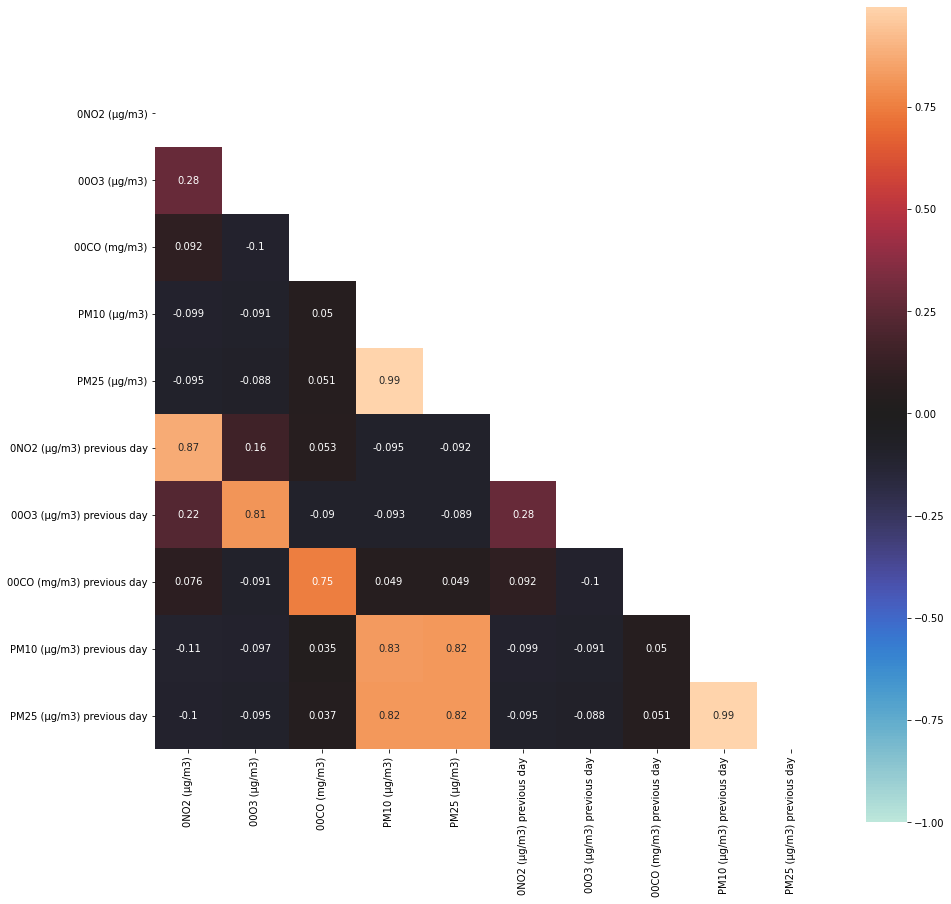

In [49]:
plt.figure(figsize=(15,15))
corr_matrix = corr_dataset.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, center=0, square=True)
plt.show()

Now that we have a better perspective on the data, we can decide what we can use for each air quality measure, to decide we took in consideration also what was read in the literature:

**NO2** :
1. Max traffic in a 3km radius of the sensor;
2. Previous values of NO2, and O3;
3. Noise level could be used as a proxy for movement in the area;
4. Elevation of Sensor;
5. Precipitation;
6. Wind speed;
7. Temperature;
8. Pressure,
9. Humidity;
10. Is_Weekend;

**O3** :

1. Max traffic in a 3km radius of the sensor;
2. Previous values of NO2, and O3;
3. Noise level could be used as a proxy for movement in the area;
4. Elevation of Sensor;
5. Precipitation;
6. Wind speed;
7. Temperature;
8. Pressure;
9. Humidity;
10. Is_Weekend;


**PM2.5 and PM10**  :  

1. Max traffic in a 3km radius of the sensor;
2. Previous values of PM2.5, and PM10;
3. Noise level could be used as a proxy for movement in the area;
4. Elevation of Sensor;
5. Precipitation;
6. Wind speed;
7. Temperature;
8. Pressure;
9. Humidity;
10. Is_Weekend

### **2.5.2 Actually Creating the Final Datasets**

Now we will create the datasets...

Several things will happen here:

* Select QART API or OpenWeatherAPI weather measures
* Select all the columns we need
* Rename columns
* **Create a new column for when it is weekend** (is_weekend)
* Fill in the missing dates with -99
* Create features of values from the previous day
* Delete missing values (-99)

In [50]:
TABLES = {}
aq = ["no2", "o3", "pm25", "pm10"]
table_cols = [
      ["sensor", "date", "max_road_traffic", "LAEQ (dB(A))", "0NO2 (µg/m3)", "00O3 (µg/m3)", "NO2_Class", "elevation", "precipitation", "00VI (km/h)", "WindSpeed", "TEMP (ºC)", "Temp", "00PA (Mbar)", "Pressure", "00HR (%)", "Humidity"],
      ["sensor", "date", "max_road_traffic", "LAEQ (dB(A))", "0NO2 (µg/m3)", "00O3 (µg/m3)", "O3_Class", "elevation", "precipitation", "00VI (km/h)", "WindSpeed", "TEMP (ºC)", "Temp", "00PA (Mbar)", "Pressure", "00HR (%)", "Humidity"],
      ["sensor", "date", "max_road_traffic", "LAEQ (dB(A))", "PM25 (µg/m3)", "PM10 (µg/m3)", "PM25_Class", "elevation", "precipitation", "00VI (km/h)", "WindSpeed", "TEMP (ºC)", "Temp", "00PA (Mbar)", "Pressure", "00HR (%)", "Humidity"],
      ["sensor", "date", "max_road_traffic", "LAEQ (dB(A))", "PM25 (µg/m3)", "PM10 (µg/m3)", "PM10_Class", "elevation", "precipitation", "00VI (km/h)", "WindSpeed", "TEMP (ºC)", "Temp", "00PA (Mbar)", "Pressure", "00HR (%)", "Humidity"],
]

new_cols = [
      ["date", "sensor", "traffic", "noise", "no2", "o3", "no2_cl", "elev", "prec", "wind", "temp", "press", "humid"],
      ["date", "sensor", "traffic", "noise", "no2", "o3", "o3_cl", "elev", "prec", "wind", "temp", "press", "humid"],
      ["date", "sensor", "traffic", "noise", "pm25", "pm10", "pm25_cl", "elev", "prec", "wind", "temp", "press", "humid"],
      ["date", "sensor", "traffic", "noise", "pm25", "pm10", "pm10_cl", "elev", "prec", "wind", "temp", "press", "humid"],
]

pass_to_previous = [
      ["noise", "no2", "o3", "prec", "wind", "temp", "press", "humid"],
      ["noise", "no2", "o3", "prec", "wind", "temp", "press", "humid"],
      ["noise", "pm25", "pm10", "prec", "wind", "temp", "press", "humid"],
      ["noise", "pm25", "pm10", "prec", "wind", "temp", "press", "humid"],
]

targets = [
      ["no2"],
      ["o3"],
      ["pm25"],
      ["pm10"],
]

for i in range(1, 11):
  for j, aq_m in enumerate(aq):
    df = dataset[dataset.sensor==i][table_cols[j]].copy()
    min = df.date.min()
    max = df.date.max()
    idx = pd.date_range(min, max)
    df.index = pd.DatetimeIndex(df.date)
    df = df.reindex(idx, fill_value=-99)

    if (((df['00VI (km/h)']==-99).sum() / df.shape[0]) > 0.5):
      print("change1")
      df.drop(columns=['00VI (km/h)'], inplace=True)
    else:
      df.drop(columns=['WindSpeed'], inplace=True)
    if (((df['TEMP (ºC)']==-99).sum() / df.shape[0]) > 0.5):
      print("change2")
      df.drop(columns=['TEMP (ºC)'], inplace=True)
    else:
      df.drop(columns=['Temp'], inplace=True)
    if (((df['00PA (Mbar)']==-99).sum() / df.shape[0]) > 0.5):
      print("change3")
      df.drop(columns=['00PA (Mbar)'], inplace=True)
    else:
      df.drop(columns=['Pressure'], inplace=True)
    if (((df['00HR (%)']==-99).sum() / df.shape[0]) > 0.5):
      print("change4")
      df.drop(columns=['00HR (%)'], inplace=True)
    else:
      df.drop(columns=['Humidity'], inplace=True)
    df = df.reset_index()
    df.drop(columns=['date'], inplace=True)

    df.columns = new_cols[j]
    df_previous = df[pass_to_previous[j]]
    df_previous.columns = df_previous.columns + "_previous"
    df_previous = df_previous.shift(1)
    y_df = df[targets[j]]
    df.drop(columns=pass_to_previous[j], inplace=True)
    df = pd.concat([df, df_previous, y_df], axis=1)

    # Create a new feature for when it is a weekday or a weekend
    def isweekend(x):
      if x.weekday() < 5:
          return 0
      else:  # 5 Sat, 6 Sun
          return 1

    df['is_weekend'] = df.date.apply(isweekend) 
    df = df.replace(-99, np.nan).dropna()
    df.to_csv(f'data/datasets/{aq_m}_s{i}.csv', index=False)
    print(f'{aq_m}_s{i}.csv was created!')

change1
change2
change3
change4
no2_s1.csv was created!
change1
change2
change3
change4
o3_s1.csv was created!
change1
change2
change3
change4
pm25_s1.csv was created!
change1
change2
change3
change4
pm10_s1.csv was created!
no2_s2.csv was created!
o3_s2.csv was created!
pm25_s2.csv was created!
pm10_s2.csv was created!
no2_s3.csv was created!
o3_s3.csv was created!
pm25_s3.csv was created!
pm10_s3.csv was created!
no2_s4.csv was created!
o3_s4.csv was created!
pm25_s4.csv was created!
pm10_s4.csv was created!
no2_s5.csv was created!
o3_s5.csv was created!
pm25_s5.csv was created!
pm10_s5.csv was created!
no2_s6.csv was created!
o3_s6.csv was created!
pm25_s6.csv was created!
pm10_s6.csv was created!
no2_s7.csv was created!
o3_s7.csv was created!
pm25_s7.csv was created!
pm10_s7.csv was created!
no2_s8.csv was created!
o3_s8.csv was created!
pm25_s8.csv was created!
pm10_s8.csv was created!
change1
change2
change3
change4
no2_s9.csv was created!
change1
change2
change3
change4
o3_s9.cs

## **2.6 Creating the models**

We will use MLP to run our predictions

In [51]:
to_drop = ['date', 'sensor']
path = './data/datasets/'
import os
no2 = pd.DataFrame()
for root, dirs, files in os.walk(path):
    for name in files:
      slash = '/';
      if name.startswith('no2'):
          no2 = pd.concat([no2, pd.read_csv(root+slash+name)])

no2.drop(columns=to_drop+['no2_cl'], inplace=True)
no2.head()

traffic  elev  noise_previous  ...  humid_previous   no2  is_weekend
0  7088.283986  36.0            51.0  ...       81.416667  77.0           0
1  7088.283986  36.0            52.0  ...       81.958333  81.0           0
2  7088.283986  36.0            52.0  ...       82.291667  89.0           0
3  7088.283986  36.0            50.0  ...       82.625000  92.0           0
4  7088.283986  36.0            53.0  ...       83.791667  82.0           0

[5 rows x 12 columns]

In [52]:
to_drop = ['date', 'sensor']
path = './data/datasets/'
o3 = pd.DataFrame()
for root, dirs, files in os.walk(path):
    for name in files:
      slash = '/';
      if name.startswith('o3'):
          o3 = pd.concat([o3, pd.read_csv(root+slash+name)])

o3.drop(columns=to_drop+['o3_cl'], inplace=True)
o3.head()

traffic  elev  noise_previous  ...  humid_previous    o3  is_weekend
0  7088.283986  36.0            51.0  ...       81.416667  81.0           0
1  7088.283986  36.0            52.0  ...       81.958333  83.0           0
2  7088.283986  36.0            52.0  ...       82.291667  91.0           0
3  7088.283986  36.0            50.0  ...       82.625000  87.0           0
4  7088.283986  36.0            53.0  ...       83.791667  73.0           0

[5 rows x 12 columns]

In [53]:
to_drop = ['date', 'sensor']
path = './data/datasets/'
pm10 = pd.DataFrame()
for root, dirs, files in os.walk(path):
    for name in files:
      slash = '/';
      if name.startswith('pm10'):
          pm10 = pd.concat([pm10, pd.read_csv(root+slash+name)])

pm10.drop(columns=to_drop+['pm10_cl'], inplace=True)
pm10.head()

traffic  elev  noise_previous  ...  humid_previous  pm10  is_weekend
0  7088.283986  36.0            51.0  ...       81.416667  41.0           0
1  7088.283986  36.0            52.0  ...       81.958333  19.0           0
2  7088.283986  36.0            52.0  ...       82.291667  17.0           0
3  7088.283986  36.0            50.0  ...       82.625000  13.0           0
4  7088.283986  36.0            53.0  ...       83.791667  11.0           0

[5 rows x 12 columns]

In [54]:
to_drop = ['date', 'sensor']
path = './data/datasets/'
pm25 = pd.DataFrame()
for root, dirs, files in os.walk(path):
    for name in files:
      slash = '/';
      if name.startswith('pm25'):
          pm25 = pd.concat([pm25, pd.read_csv(root+slash+name)])

pm25.drop(columns=to_drop+['pm25_cl'], inplace=True)
pm25.head()

traffic  elev  noise_previous  ...  humid_previous  pm25  is_weekend
0  7088.283986  36.0            51.0  ...       81.416667  16.0           0
1  7088.283986  36.0            52.0  ...       81.958333   7.0           0
2  7088.283986  36.0            52.0  ...       82.291667   6.0           0
3  7088.283986  36.0            50.0  ...       82.625000   4.0           0
4  7088.283986  36.0            53.0  ...       83.791667   4.0           0

[5 rows x 12 columns]


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Train on 2187 samples, validate on 327 samples
Epoch 1/100





2187/2187 [==============================] - 1s - loss: 0.0061 - val_loss: 0.0021
Epoch 2/100
2187/2187 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0019
Epoch 3/100
2187/2187 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0017
Epoch 4/100
2187/2187 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0017
Epoch 5/100
2187/2187 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0018
Epoch 6/100
2187/2187 [========================

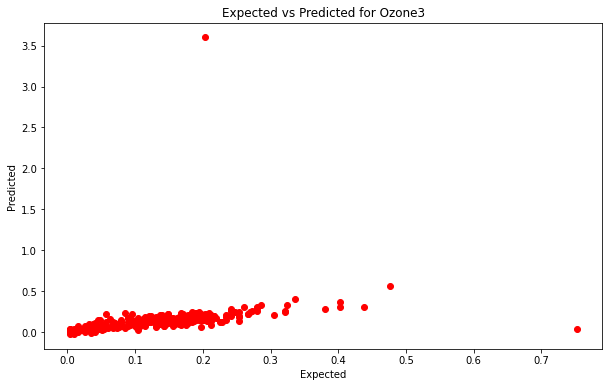

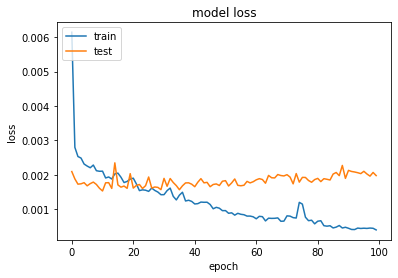

Train on 2187 samples, validate on 327 samples
Epoch 1/100
2187/2187 [==============================] - 0s - loss: 0.0060 - val_loss: 8.0602e-04
Epoch 2/100
2187/2187 [==============================] - 0s - loss: 0.0014 - val_loss: 5.5926e-04
Epoch 3/100
2187/2187 [==============================] - 0s - loss: 0.0011 - val_loss: 7.7785e-04
Epoch 4/100
2187/2187 [==============================] - 0s - loss: 0.0011 - val_loss: 7.6445e-04
Epoch 5/100
2187/2187 [==============================] - 0s - loss: 0.0011 - val_loss: 3.7649e-04
Epoch 6/100
2187/2187 [==============================] - 0s - loss: 9.1246e-04 - val_loss: 3.7099e-04
Epoch 7/100
2187/2187 [==============================] - 0s - loss: 9.5572e-04 - val_loss: 3.9787e-04
Epoch 8/100
2187/2187 [==============================] - 0s - loss: 9.5613e-04 - val_loss: 4.4041e-04
Epoch 9/100
2187/2187 [==============================] - 0s - loss: 9.0182e-04 - val_loss: 4.5947e-04
Epoch 10/100
2187/2187 [==============================]

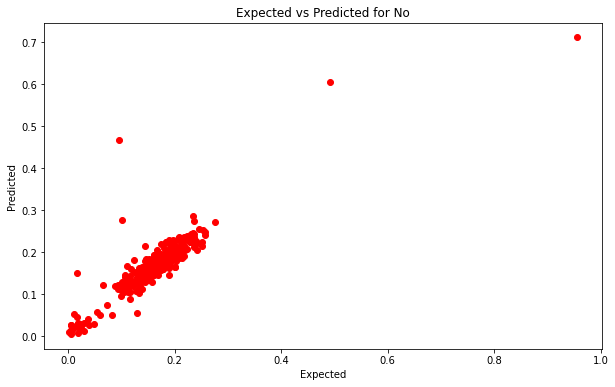

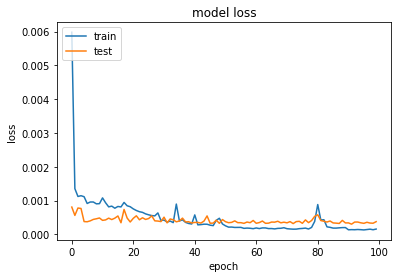

Train on 2184 samples, validate on 327 samples
Epoch 1/100
2184/2184 [==============================] - 1s - loss: 0.0034 - val_loss: 0.0014
Epoch 2/100
2184/2184 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0014
Epoch 3/100
2184/2184 [==============================] - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 4/100
2184/2184 [==============================] - 0s - loss: 0.0018 - val_loss: 0.0013
Epoch 5/100
2184/2184 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
2184/2184 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0012
Epoch 7/100
2184/2184 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0017
Epoch 8/100
2184/2184 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0012
Epoch 9/100
2184/2184 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0020
Epoch 10/100
2184/2184 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0018
Epoch 11/100

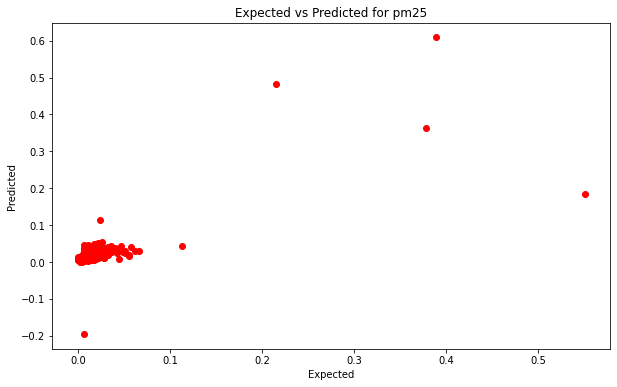

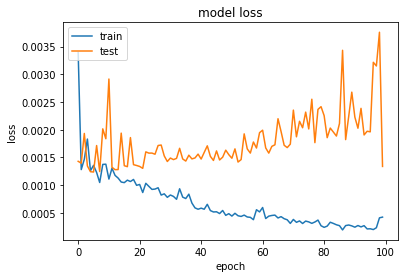

Train on 2185 samples, validate on 327 samples
Epoch 1/100
2185/2185 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0033
Epoch 2/100
2185/2185 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0015
Epoch 3/100
2185/2185 [==============================] - 0s - loss: 0.0042 - val_loss: 7.1819e-04
Epoch 4/100
2185/2185 [==============================] - 0s - loss: 0.0011 - val_loss: 0.0022
Epoch 5/100
2185/2185 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0012
Epoch 6/100
2185/2185 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0012
Epoch 7/100
2185/2185 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0018
Epoch 8/100
2185/2185 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 9/100
2185/2185 [==============================] - 0s - loss: 0.0010 - val_loss: 6.0996e-04
Epoch 10/100
2185/2185 [==============================] - 0s - loss: 0.0012 - val_loss: 9.7600e-04


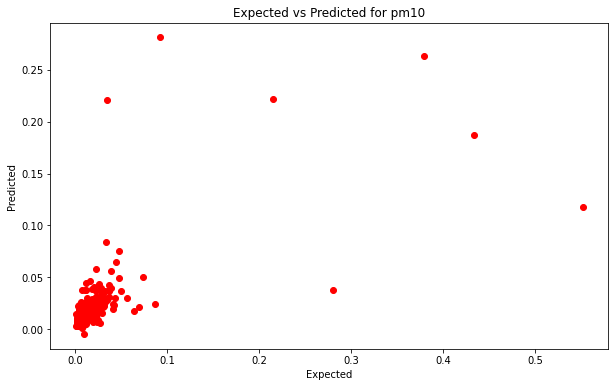

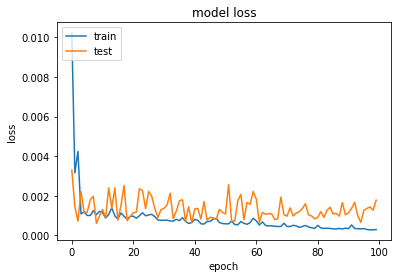

In [55]:
for gaz in ['Ozone3','No','pm25','pm10']:
  if gaz == 'Ozone3':
    data = o3.copy()
    variables_continuous=['traffic', 'elev', 'noise_previous', 'no2_previous', 'o3_previous',
       'prec_previous', 'wind_previous', 'temp_previous', 'press_previous',
       'humid_previous']
    target_var = 'o3'
  elif gaz == 'pm10':
    data = pm10.copy()
    variables_continuous=['traffic', 'elev', 'noise_previous', 'pm25_previous', 'pm10_previous',
       'prec_previous', 'wind_previous', 'temp_previous', 'press_previous',
       'humid_previous']
    target_var = 'pm10'
  elif gaz == 'pm25':
    data = pm25.copy()
    variables_continuous=['traffic', 'elev', 'noise_previous', 'pm25_previous', 'pm10_previous',
       'prec_previous', 'wind_previous', 'temp_previous', 'press_previous',
       'humid_previous']
    target_var = 'pm25'
  elif gaz == 'No':
    data = no2.copy()
    variables_continuous=['traffic', 'elev', 'noise_previous', 'no2_previous', 'o3_previous',
       'prec_previous', 'wind_previous', 'temp_previous', 'press_previous',
       'humid_previous']
    target_var = 'no2'

  # demonstrate data normalization with sklearn  # load data
  # create scaler
  scaler = MinMaxScaler()
  # fit scaler on data
  scaler.fit(data)
  # apply transform
  normalized = scaler.transform(data)
  # inverse transform
  inverse = scaler.inverse_transform(normalized)
  df = pd.DataFrame(normalized, columns=data.columns)    

  if len(variables_continuous)!=0:
      scaler = StandardScaler()
      df[variables_continuous]=scaler.fit_transform(df[variables_continuous])


  variables_categorical=['is_weekend']

  categories={feature:pd.Categorical(df[feature]).categories for feature in variables_categorical}

  for feature in variables_categorical:
      df[feature] = pd.Categorical(df[feature],categories=categories[feature]).codes

  vc={x:len(categories[x]) for x in variables_categorical}

  train, test_x, train_y, test_y = train_test_split(df[variables_categorical+variables_continuous], df[target_var], 
    test_size = 0.10, random_state = 42)


  X_train, X_validation, Y_train, Y_validation = train_test_split(train, train_y, 
    test_size = 0.13, random_state = 42)
  
  ###############test_phase

  variables1 = variables_categorical+variables_continuous

  batchsize=50
  epochs1=100

  models1=[]

  model_feriado= Sequential()
  model_feriado.add(Embedding(vc['is_weekend'], 2, input_length=1))
  model_feriado.add(Flatten())
  models1.append(model_feriado)

  if len(variables_continuous)!=0:
      for var in variables_continuous:
          model_var = Sequential()
          model_var.add(Dense(1,input_dim=1))
          models1.append(model_var)  
          
  model1 = Sequential()
  model1.add(Merge(models1, mode='concat'))
  model1.add(Dense(500, init="normal", activation='relu'))
  model1.add(Dense(200, init="normal", activation='relu'))
  model1.add(Dense(1, init="normal",activation='linear'))
  model1.compile(loss='mean_squared_error', optimizer='adam')
  history = model1.fit([np.array(X_train[x]) for x in variables1],Y_train,nb_epoch=epochs1, batch_size = batchsize, validation_data=([np.array(X_validation[x]) for x in variables1],Y_validation),shuffle=True) 

  pred=model1.predict([np.array(test_x[x]) for x in variables1])
  preds = list(pred.reshape(1,-1)[0])
  expected = test_y.values
  combine = pd.concat([pd.DataFrame(expected), pd.DataFrame(preds)], axis=1)
  combine.columns = ['Expected','Predicted']

  ##Evaluation

  mse = mean_squared_error(combine['Expected'],combine['Predicted'])
  print('mse',mse)
  rmse = np.sqrt(mse)
  print('rmse', rmse)

  ##Evaluation
  plt.figure(figsize=(10,6))
  plt.scatter(combine['Expected'], combine['Predicted'], color='red')
  plt.title("Expected vs Predicted for %s" %(gaz))
  plt.xlabel('Expected')
  plt.ylabel('Predicted')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  model1.save("models/%s_model.h5" %(gaz))
  
  

## **2.7 Classifying the different activities and places**

Even though we have the models created, we did not have time to implement the prediction of the models to get values for a specific date. So we decided to use dummy data for the rest of our solution.

The idea here is to use KNN to identify the class to which a particular activity/place belongs to.

### **2.7.1 Testing - Loading the Data**

In [56]:
# This serves as an example, so we will just get the latitude and longitude of the sensors
sensor_local = sensor_location[['latitude', 'longitude']].copy()
sensor_local.head()

latitude  longitude
0  38.690370  -9.353812
1  38.753079  -9.449354
2  38.726879  -9.468330
3  38.725454  -9.332841
4  38.735102  -9.367997

In [57]:
# And then we add the rest of the values as if they had been predicted by the models
sensor_local['no2_predicted'] = np.asarray(list(dataset['0NO2 (µg/m3)'].sample(9)))
sensor_local['o3_predicted'] = np.asarray(list(dataset['00O3 (µg/m3)'].sample(9)))
sensor_local['pm10_predicted'] = np.asarray(list(dataset['PM10 (µg/m3)'].sample(9)))
sensor_local['pm25_predicted'] = np.asarray(list(dataset['PM25 (µg/m3)'].sample(9)))
sensor_local.head()

latitude  longitude  ...  pm10_predicted  pm25_predicted
0  38.690370  -9.353812  ...            11.0             3.0
1  38.753079  -9.449354  ...            14.0             1.0
2  38.726879  -9.468330  ...             7.0            10.0
3  38.725454  -9.332841  ...            18.0             4.0
4  38.735102  -9.367997  ...            27.0             8.0

[5 rows x 6 columns]

In [58]:
# Load the desportos natureza
desportos_natureza = gpd.read_file('data/provided_data/mndesportonatureza.geojson')
desportos_natureza['lon'] = desportos_natureza.geometry.x
desportos_natureza['lat'] = desportos_natureza.geometry.y
desportos_natureza = desportos_natureza[['Tipo', 'Nome', 'lat', 'lon']]
desportos_natureza.dropna(subset=['lat'], inplace=True)
desportos_natureza.head()


Tipo                                 Nome        lat       lon
36  Escalada                          Mexelhoeiro  38.693776 -9.435694
37  Escalada           Escola de Escalada da Guia  38.695164 -9.446055
38  Escalada                  Encosta dos Bêbados  38.730981 -9.432041
39    Grutas  Casa da Gruta - Associação Desnível  38.710214 -9.425880
40    Grutas                                Pisão  38.740879 -9.423609

In [59]:
# Load the desportos nauticos
desportos_nauticos = gpd.read_file('data/provided_data/mnequipareadesportonautico.geojson')
desportos_nauticos['geometry'] = desportos_nauticos.geometry.centroid
desportos_nauticos['lon'] = desportos_nauticos.geometry.x
desportos_nauticos['lat'] = desportos_nauticos.geometry.y
desportos_nauticos = desportos_nauticos[['Fonte', 'Nome', 'lat', 'lon']]
desportos_nauticos.dropna(subset=['lat'], inplace=True)
desportos_nauticos.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


Fonte                Nome        lat       lon
0  Clube Naval de Cascais  Campo de Regatas 5  38.672432 -9.434322
1  Clube Naval de Cascais  Campo de Regatas 1  38.688872 -9.405476
2  Clube Naval de Cascais  Campo de Regatas 2  38.680564 -9.381572
3  Clube Naval de Cascais  Campo de Regatas 3  38.664812 -9.357582
4  Clube Naval de Cascais  Campo de Regatas 4  38.660920 -9.399754

In [60]:
# Load espaços verdes
estrutura_verde = gpd.read_file('data/provided_data/mnestruturaverde.geojson')
estrutura_verde['geometry'] = estrutura_verde.geometry.centroid
estrutura_verde['lon'] = estrutura_verde.geometry.x
estrutura_verde['lat'] = estrutura_verde.geometry.y
estrutura_verde = estrutura_verde[['Local', 'Rua', 'lat', 'lon']]
estrutura_verde.dropna(subset=['lat'], inplace=True)
estrutura_verde.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


Local                               Rua        lat       lon
0              Torre                  Rua do Pato Real  38.710013 -9.447259
1              Torre                  Rua do Pato Real  38.710013 -9.447259
2  Bairro do Rosário  Avenida Nossa Senhora do Rosário  38.695396 -9.434418
3  Bairro do Rosário  Avenida Nossa Senhora do Rosário  38.695396 -9.434418
4            Cascais           Rua José Cunha Brochado  38.699634 -9.425346

In [61]:
# Load horta
hortas = gpd.read_file('data/provided_data/mnhorta.geojson')
hortas['geometry'] = hortas.geometry.centroid
hortas['lon'] = hortas.geometry.x
hortas['lat'] = hortas.geometry.y
hortas = hortas[['Local', 'Nome', 'lat', 'lon']]
hortas.dropna(subset=['lat'], inplace=True)
hortas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


Local  ...       lon
0  Quinta da Bela Vista  ... -9.320955
1               Adroana  ... -9.378287
2              Zambujal  ... -9.344444
3        Aldeia de Juzo  ... -9.447778
4   São João do Estoril  ... -9.384879

[5 rows x 4 columns]

In [62]:
# Load parque infantil
parquejardim = gpd.read_file('data/provided_data/mnparquejardim.geojson')
parquejardim['geometry'] = parquejardim.geometry.centroid
parquejardim['lon'] = parquejardim.geometry.x
parquejardim['lat'] = parquejardim.geometry.y
parquejardim = parquejardim[['Local', 'Designação', 'lat', 'lon']]
parquejardim.dropna(subset=['lat'], inplace=True)
parquejardim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


Local                    Designação        lat       lon
0            Guia        Adm. Condomínio, Lt 23  38.697208 -9.442202
1            Guia        Adm. Condomínio, Lt 23  38.697208 -9.442202
2        Trajouce  Urbanização Terras do Moínho  38.736414 -9.337762
3        Trajouce  Urbanização Terras do Moínho  38.736414 -9.337762
4  Aldeia de Juzo            Pinhal da Charneca  38.731480 -9.450678

In [63]:
# Load praia
praia = gpd.read_file('data/provided_data/mnpraia.geojson')
praia['geometry'] = praia.geometry.centroid
praia['lon'] = praia.geometry.x
praia['lat'] = praia.geometry.y
praia = praia[['Tipologia', 'Nome', 'lat', 'lon']]
praia.dropna(subset=['lat'], inplace=True)
praia.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


Tipologia  ...       lon
0  Praia Urbana com Uso Intensivo Tipo I  ... -9.416500
1  Praia Urbana com Uso Intensivo Tipo I  ... -9.416500
2  Praia Urbana com Uso Intensivo Tipo I  ... -9.389755
3  Praia Urbana com Uso Intensivo Tipo I  ... -9.389755
4  Praia Urbana com Uso Intensivo Tipo I  ... -9.366521

[5 rows x 4 columns]

In [64]:
dfs = [desportos_natureza, desportos_nauticos, estrutura_verde, hortas, parquejardim, praia]
for df in dfs:
  df.columns = ['name1', 'name2', 'lat', 'lon']
predict_set = pd.concat(dfs)
predict_set.head()

name1                                name2        lat       lon
36  Escalada                          Mexelhoeiro  38.693776 -9.435694
37  Escalada           Escola de Escalada da Guia  38.695164 -9.446055
38  Escalada                  Encosta dos Bêbados  38.730981 -9.432041
39    Grutas  Casa da Gruta - Associação Desnível  38.710214 -9.425880
40    Grutas                                Pisão  38.740879 -9.423609

In [65]:
# Loading to use in the pipeline
predict_set.to_csv('activities.csv', index=False)

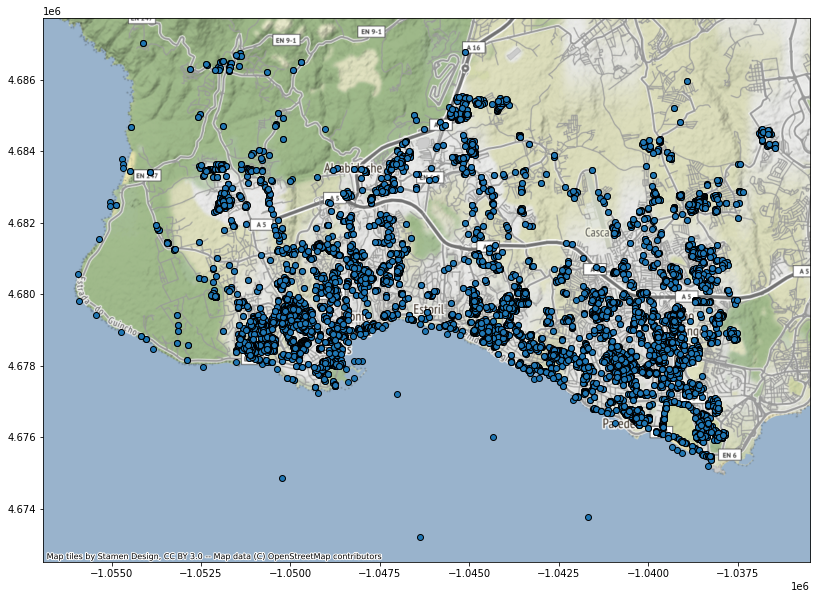

In [66]:
# We can visualize the dataset points here, there are a lot of activities in Cascais!
another = gpd.GeoDataFrame(predict_set, geometry=gpd.points_from_xy(predict_set.lon, predict_set.lat), crs=4326)
another = another.to_crs(3857)
ax = another.plot(figsize=(20,10), edgecolor='k')
ctx.add_basemap(ax)

### **2.7.2 Testing - Predicting Class for Activities**

In [67]:
X = np.asarray(predict_set[['lat', 'lon']])
X_train = np.asarray(sensor_local[['latitude', 'longitude']])
y_train_no2 = np.asarray(sensor_local['no2_predicted'])
y_train_o3 = np.asarray(sensor_local['o3_predicted'])
y_train_pm10 = np.asarray(sensor_local['pm10_predicted'])
y_train_pm25 = np.asarray(sensor_local['pm25_predicted'])

In [68]:
# init KNNs
neigh_no2 = KNeighborsRegressor(n_neighbors=3)
neigh_o3 = KNeighborsRegressor(n_neighbors=3)
neigh_pm10 = KNeighborsRegressor(n_neighbors=3)
neigh_pm25 = KNeighborsRegressor(n_neighbors=3)

# Train KNNs
neigh_no2.fit(X_train, y_train_no2)
neigh_o3.fit(X_train, y_train_o3)
neigh_pm10.fit(X_train, y_train_pm10)
neigh_pm25.fit(X_train, y_train_pm25)

# Assign values to each activity
predict_set['no2_predicted'] = neigh_no2.predict(X)
predict_set['o3_predicted'] = neigh_o3.predict(X)
predict_set['pm10_predicted'] = neigh_pm10.predict(X)
predict_set['pm25_predicted'] = neigh_pm25.predict(X)

predict_set.head()

name1  ... pm25_predicted
36  Escalada  ...       8.666667
37  Escalada  ...      11.000000
38  Escalada  ...       7.000000
39    Grutas  ...       8.666667
40    Grutas  ...       7.000000

[5 rows x 9 columns]

In [69]:
mins = [[0,20,35,50,100],[0,10,20,25,50],[0,40,100,200,400],[0,80,100,180,240]]
maxes = [[20,35,50,100,1200],[10,20,25,50,800],[40,100,200,400,1000],[80,100,180,240,600]]

def to_class(x, mins, maxes):
  i = 0
  for min_,max_ in zip(mins,maxes):
    if (x>=min_) & (x<=max_):
      return i
    i+=1
  return -1 # In case the values are out of the intervals (only case at this moment is -99 cases of PM2.5)
    

predict_set['PM10_Class'] = predict_set['pm10_predicted'].apply(to_class, args=(mins[0],maxes[0]))
predict_set['PM25_Class'] = predict_set['pm25_predicted'].apply(to_class, args=(mins[1],maxes[1]))
predict_set['NO2_Class'] = predict_set['no2_predicted'].apply(to_class, args=(mins[2],maxes[2]))
predict_set['O3_Class'] = predict_set['o3_predicted'].apply(to_class, args=(mins[3],maxes[3]))
predict_set.head()

name1                                name2  ...  NO2_Class  O3_Class
36  Escalada                          Mexelhoeiro  ...          1         0
37  Escalada           Escola de Escalada da Guia  ...          1         0
38  Escalada                  Encosta dos Bêbados  ...          1         0
39    Grutas  Casa da Gruta - Associação Desnível  ...          1         0
40    Grutas                                Pisão  ...          1         0

[5 rows x 13 columns]

In [70]:
# We assignt he worst air quality class to the activity
predict_set['air_quality_class'] = predict_set[['PM10_Class', 'PM25_Class', 'NO2_Class', 'O3_Class']].max(axis=1)
predict_set.head()

name1                                name2  ...  O3_Class  air_quality_class
36  Escalada                          Mexelhoeiro  ...         0                  1
37  Escalada           Escola de Escalada da Guia  ...         0                  1
38  Escalada                  Encosta dos Bêbados  ...         0                  1
39    Grutas  Casa da Gruta - Associação Desnível  ...         0                  1
40    Grutas                                Pisão  ...         0                  1

[5 rows x 14 columns]

### **2.7.3 Testing - Results**

In [71]:
# Sort by class, 0 is good air quality, 4 is the worst air quality class.
predict_set[['name1', 'name2', 'air_quality_class']].sort_values('air_quality_class')

name1  ... air_quality_class
36                Escalada  ...                 1
6655  São Domingos de Rana  ...                 1
6656              Zambujal  ...                 1
6657              Zambujal  ...                 1
6658            Matarraque  ...                 1
...                    ...  ...               ...
9432               Murches  ...                 2
7983        Aldeia de Juzo  ...                 2
7982        Aldeia de Juzo  ...                 2
8026        Aldeia de Juzo  ...                 2
9448     Malveira da Serra  ...                 2

[10322 rows x 3 columns]

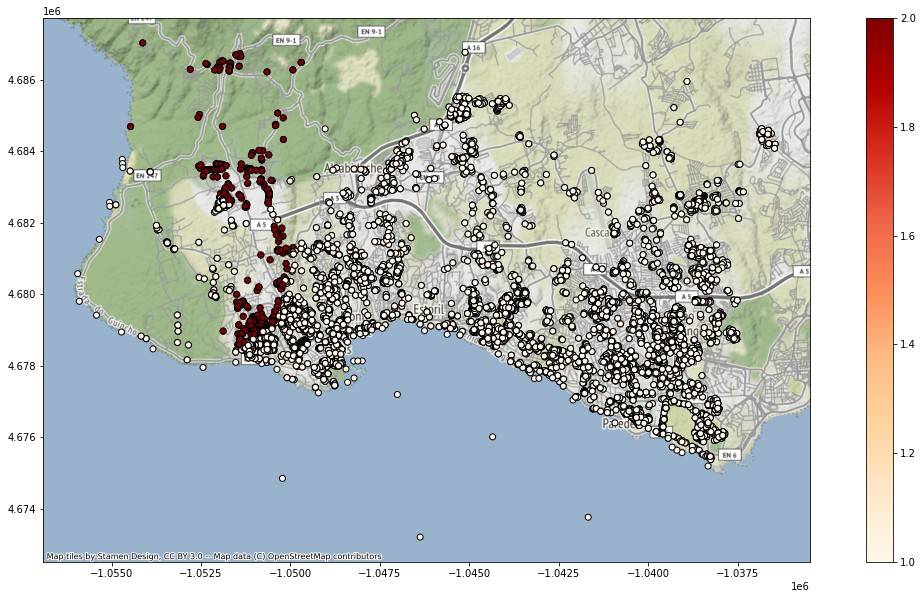

In [72]:
predict_set = gpd.GeoDataFrame(predict_set, geometry=predict_set.geometry, crs=4326)
predict_set = predict_set.to_crs(3857)
ax = predict_set.plot(figsize=(20,10), edgecolor='k', column='air_quality_class', legend=True, cmap='OrRd')
ctx.add_basemap(ax)

# **3. Conclusions**

## **3.1 Scalability and Impact**

Having the models trained and saved, we can then use a pipeline to make predictions for a specific day, as long as we have the right features.

![](https://drive.google.com/uc?export=view&id=1dtQH1C_iy7UJnpoQ4ucZV-Y_Yq_5PhlI)

The diagram is organized always from features->model->outcome.

To summarize the pipeline works in the following way:

1. It uses the features from the sensors and any other external data to make predictions of air quality for each of the sensors. We end up with the 4 predicted values for each of the sensors;
2. We use the predicted values to train a KNN using the latitude and longitude of the sensors;
3. We predict the values for the activities based on their location. The KNN will interpolate based on the 3 nearest neighbors (sensors).
4. We assign the respective air quality class for each of the measures, we take the maximum class as it should represent the maximum risk, and show the list of activities with its associated predicted air quality class, as well a visualization plot with each point coloured according to their air quality class.

We believe this product could be useful both for the city of Cascais and any other that would like to provide some insight into open-air activities and their associated predicted air quality.

## **3.2 Future Work**

To finalise our work here we would have to include the prediction of the models (which are created and saved in models/*) (section 2.6) and include them in the rest of the pipeline (section 2.7). It isn't much more work, but we did not have enough time to conclude it.

### **3.2.1 Adding more data**

It was thought about more features for the models. The following could be obtained with the data we already have:

* Number of roads close to the sensors
* The number of parks close by as they can help clean the air

Other data could also be gathered, and could help as it mentioned in the literature as important factors for these molecules:

* NO is the molecule that derives from combustible [1] and could help know right before we get higher values of NO2.
* UV is responsible for converting O3 -> O2 so knowing how it varies could help predicting O3 levels.

### **3.2.2 Experimenting with a Classification problem.**

We can convert to classes according to the UN classification for air quality, and then see how classification models fare. This could be an alternative to this whole process.


### **3.2.3 Analysing the weights**

We have used Deep Learning Neural Networks, so it becomes very difficult to analyse the most important variables. Since some papers mention that indeed these models perform a lot better than classic and simpler ones, we could use a MLP with only one layer as done by Perez & Trier [1] and analyse the weights provided to each of the neurons. This could provide us an insight into how the values are interacting with each other and which measures can be taken in order to reduce the air polution.